<a href="https://colab.research.google.com/github/msalihk1git/Project_2/blob/main/Copy_of_HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
#Load dataset
df=pd.read_csv("/content/drive/MyDrive/Luminar_Projects/Project/Project_2/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Basics EDA**

In [ ]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
#Identify missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [ ]:
#Describe the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
#Analysing categorical columns 
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
df.groupby("Department").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
Department,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [ ]:
df.groupby("salary").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


In [ ]:
pd.crosstab(df.salary,df.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


Most of the employees with low salary leaving the firm  compared to medium and high salaried employees

In [ ]:
df["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

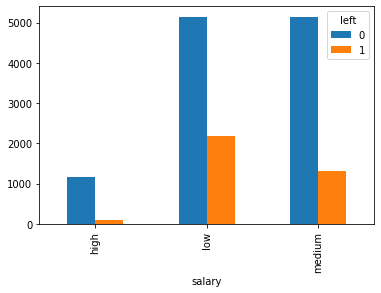

In [ ]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

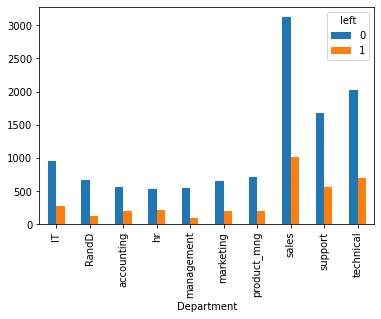

In [ ]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

The figure shows that the more employees left  the firm from sales department 

In [ ]:
df.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


from above table we can  draw following conclusions:

  1.satisfaction level seems to relatively low(0.44) in employees leaving the  firm vs retained ones(0.66)           
  2.avg monthly hours are higher in employees leaving the firm (199 vs 207)
  3. promotion last 5 years: Employees who are given         promotion are likely to retain at firm





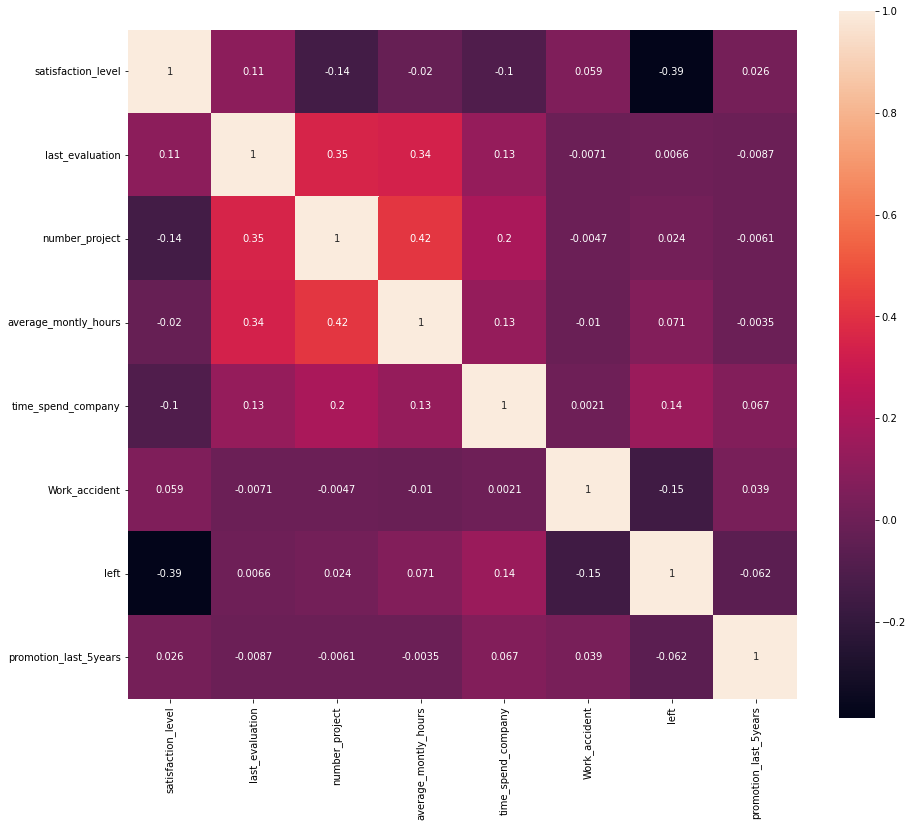

In [ ]:
#Correlation 
corr_df= df.corr()
plt.figure(figsize = (15,13))
sns.heatmap(corr_df, square = True, annot = True)
plt.show()

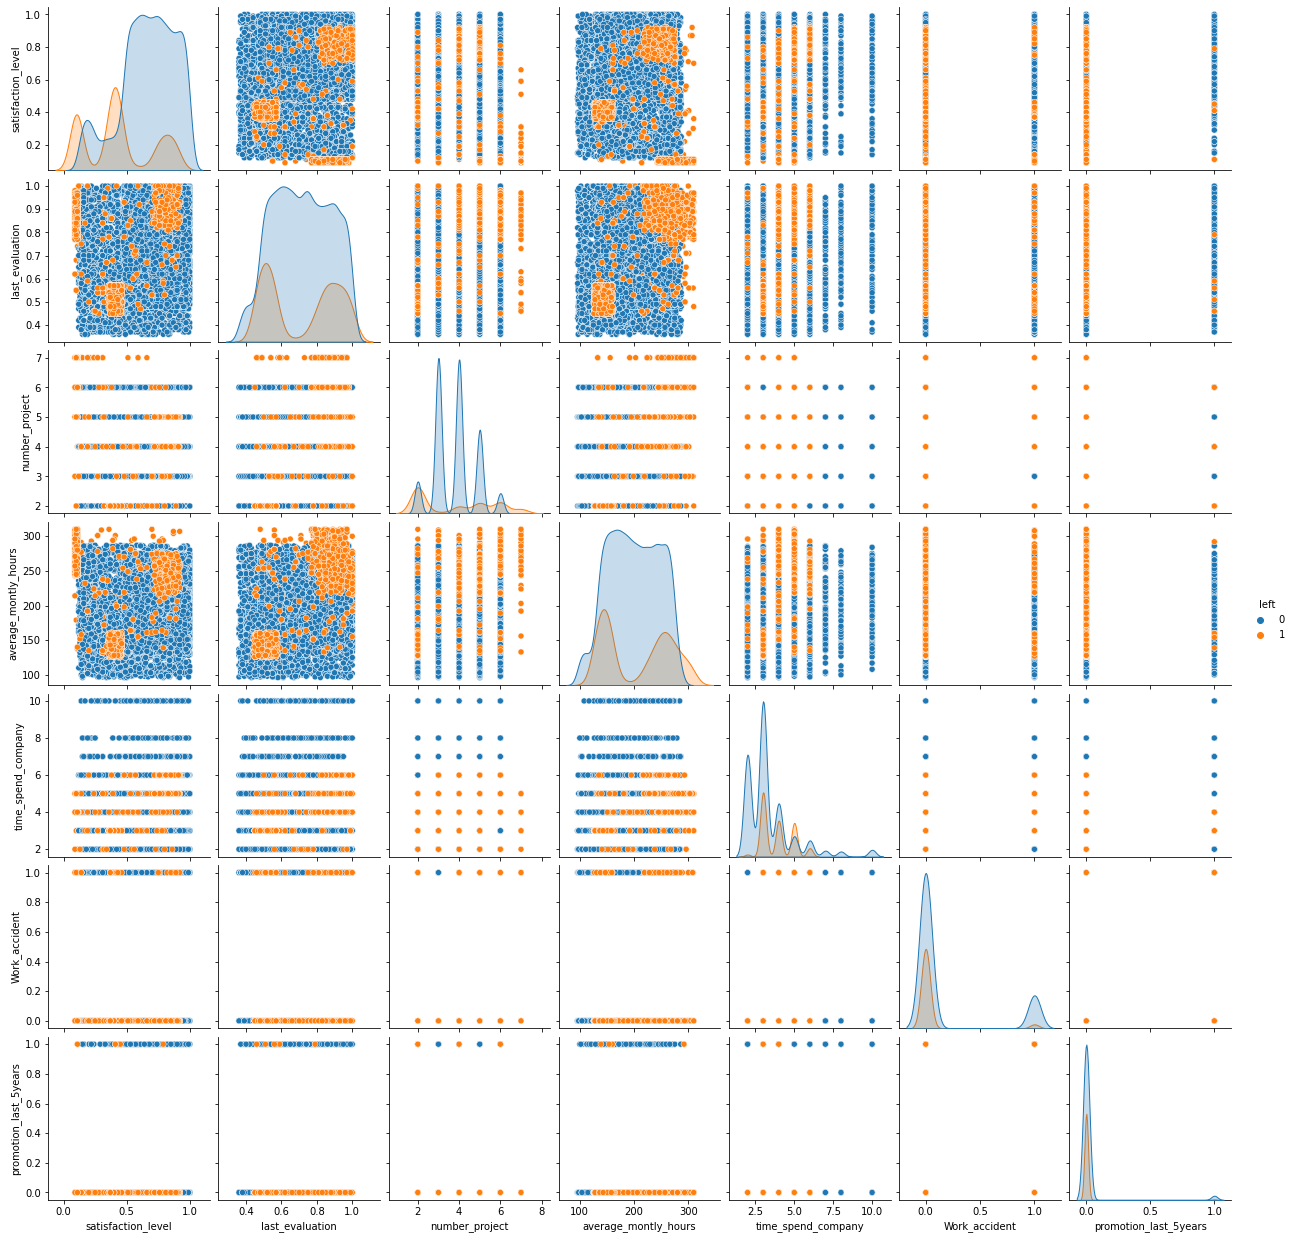

In [ ]:
#pairplot using sns
sns.pairplot(df,hue="left")

**Handling Outliers**

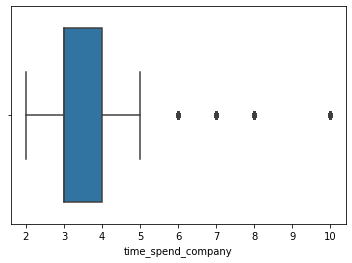

In [ ]:
sns.boxplot(df['time_spend_company'])

In [ ]:
numericalColumns=df.select_dtypes(include=np.number).columns
numericalColumns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

In [ ]:
use_cols=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years']

In [ ]:
for column in use_cols:
  upper_lim=df[column].mean()+df[column].std()*3
  lower_lim=df[column].mean()-df[column].std()*3

  df.loc[(df[column]>upper_lim),column]=upper_lim
  df.loc[(df[column]<lower_lim),column]=lower_lim

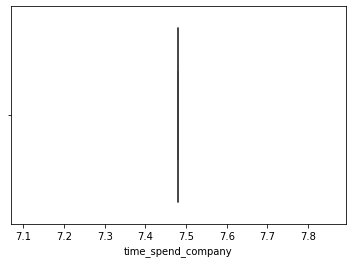

In [ ]:
#checking again for outliers
sns.boxplot(df['time_spend_company'])

In [ ]:
salary_map={'low':0,'medium':1,'high':2}

df=df.replace({'salary':salary_map})

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,1,0.0,sales,0
1,0.80,0.86,5.0,262.0,6.0,0.0,1,0.0,sales,1
2,0.11,0.88,7.0,272.0,4.0,0.0,1,0.0,sales,1
3,0.72,0.87,5.0,223.0,5.0,0.0,1,0.0,sales,0
4,0.37,0.52,2.0,159.0,3.0,0.0,1,0.0,sales,0


In [ ]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,1,0.0,sales,0
1,0.80,0.86,5.0,262.0,6.0,0.0,1,0.0,sales,1
2,0.11,0.88,7.0,272.0,4.0,0.0,1,0.0,sales,1
3,0.72,0.87,5.0,223.0,5.0,0.0,1,0.0,sales,0
4,0.37,0.52,2.0,159.0,3.0,0.0,1,0.0,sales,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0,0.0,1,0.0,support,0
14995,0.37,0.48,2.0,160.0,3.0,0.0,1,0.0,support,0
14996,0.37,0.53,2.0,143.0,3.0,0.0,1,0.0,support,0
14997,0.11,0.96,6.0,280.0,4.0,0.0,1,0.0,support,0


In [ ]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
dept_map={'sales':0, 'accounting':1, 'hr':2, 'technical':3, 'support':4, 'management':5,
       'IT':6, 'product_mng':7, 'marketing':8, 'RandD':9}
df=df.replace({'Department': dept_map})
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,1,0.0,0,0
1,0.80,0.86,5.0,262.0,6.0,0.0,1,0.0,0,1
2,0.11,0.88,7.0,272.0,4.0,0.0,1,0.0,0,1
3,0.72,0.87,5.0,223.0,5.0,0.0,1,0.0,0,0
4,0.37,0.52,2.0,159.0,3.0,0.0,1,0.0,0,0


In [ ]:
df['Department'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**Train Test Split**

In [ ]:
from pandas.core.common import random_state
X=df.drop(['left'],axis=1)
y=df['left']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [ ]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,0,0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,0,1
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,0,1
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,0,0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,0,0


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

**Scale Down**

In [ ]:
scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)

import joblib
joblib.dump(scale,"/content/drive/MyDrive/Luminar_Projects/Project/Project_2/scale.pkl")

['/content/drive/MyDrive/Luminar_Projects/Project/Project_2/scale.pkl']

**Apply all Classification algorithms**

In [ ]:
lr_clf=LogisticRegression()
dr_clf=DecisionTreeClassifier()
rf_clf=RandomForestClassifier()
adaboost_clf=AdaBoostClassifier()
grad_clf=GradientBoostingClassifier()
svc_clf=SVC()

voting=VotingClassifier(estimators=[("Logistic_Regression",lr_clf),("Decision_Tree_Classifier",dr_clf),("Random_Forest_Classifier",rf_clf),("AdaBoost_Classifier",adaboost_clf),("Gragient_Boosting_Classifier",grad_clf),("SVC",svc_clf)],voting="hard")

voting.fit(X_train,y_train)

VotingClassifier(estimators=[('Logistic_Regression', LogisticRegression()),
                             ('Decision_Tree_Classifier',
                              DecisionTreeClassifier()),
                             ('Random_Forest_Classifier',
                              RandomForestClassifier()),
                             ('AdaBoost_Classifier', AdaBoostClassifier()),
                             ('Gragient_Boosting_Classifier',
                              GradientBoostingClassifier()),
                             ('SVC', SVC())])

In [ ]:
for  clf in (lr_clf,dr_clf,rf_clf,adaboost_clf,grad_clf,svc_clf):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  print(clf.__class__.__name__,clf.score(X_train,y_train))
  print(clf.__class__.__name__,accuracy_score(y_test,y_pred))
  
  print("===========================")

LogisticRegression 0.7929326602533575
LogisticRegression 0.7884444444444444
DecisionTreeClassifier 1.0
DecisionTreeClassifier 0.9742222222222222
RandomForestClassifier 1.0
RandomForestClassifier 0.9877777777777778
AdaBoostClassifier 0.9609486617773121
AdaBoostClassifier 0.9582222222222222
GradientBoostingClassifier 0.9793313648918944
GradientBoostingClassifier 0.9724444444444444
SVC 0.7837889322792647
SVC 0.7846666666666666


**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
lr_clf =LogisticRegression()
df_clf= DecisionTreeClassifier()
rf_clf= RandomForestClassifier()
adaboost_clf= AdaBoostClassifier()
grad_clf=GradientBoostingClassifier()
svc_clf=SVC()

clf_list=[lr_clf,df_clf,rf_clf,adaboost_clf,grad_clf,svc_clf]

grid_params_lr= [{'penalty':['l1','l2'],'solver':['saga']}]

grid_params_df =[{'criterion':["gini","entropy"], 'splitter':['best','random'],'max_depth':[3,4,5],'min_samples_split':[2,3,4],'max_features':["auto","sqrt","log2"]}]

grid_params_rf=[{'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt','auto'], 'criterion': ['entropy', 'gini'],'max_depth': [2, 3, 5, 10]}]

grid_params_adaboost=[{'n_estimators':[10,50,250,1000],'learning_rate':[0.01,0.1],}]

grid_params_grad=[{'loss':['deviance', 'exponential'],'learning_rate':[1,7,9],'criterion':['friedman_mse','mse']}]

grid_params_svc=[{'kernel':['linear','poly','rbf'],'degree':[3,4,5]}]




clf_params=[grid_params_lr,grid_params_df,grid_params_rf,grid_params_adaboost,grid_params_grad,grid_params_svc]

In [ ]:
for clf,clf_param in zip(clf_list,clf_params):
  print(f"The Classifier is {clf} and its hyper params are {clf_param}")

  grid_clf = GridSearchCV(estimator=clf,param_grid=clf_param,scoring="accuracy",cv=10)
  grid_clf.fit(X_train_scaled,y_train)
  print(f"The Train accuracy for the {clf} is {grid_clf.score(X_train_scaled,y_train)}")
  print(f"The Test accuracy for the {clf} is {grid_clf.score(X_test_scaled,y_test)}")
  print(f"The best param for {clf} is {grid_clf.best_params_}")
  print("====================\n")

The Classifier is LogisticRegression() and its hyper params are [{'penalty': ['l1', 'l2'], 'solver': ['saga']}]
The Train accuracy for the LogisticRegression() is 0.7927421659205639
The Test accuracy for the LogisticRegression() is 0.7846666666666666
The best param for LogisticRegression() is {'penalty': 'l2', 'solver': 'saga'}

The Classifier is DecisionTreeClassifier() and its hyper params are [{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 3, 4], 'max_features': ['auto', 'sqrt', 'log2']}]
The Train accuracy for the DecisionTreeClassifier() is 0.9464710924849986
The Test accuracy for the DecisionTreeClassifier() is 0.938
The best param for DecisionTreeClassifier() is {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'splitter': 'best'}

The Classifier is RandomForestClassifier() and its hyper params are [{'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt', 'auto'], 'criter

In [ ]:
#Making the best models
AdaBoost_clf=AdaBoostClassifier(learning_rate= 0.01, n_estimators=10)
AdaBoost_clf.fit(X_train_scaled,y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=10)

In [ ]:
#Pickle file
import joblib
joblib.dump(AdaBoost_clf,"/content/drive/MyDrive/Luminar_Projects/Project/Project_2/model.pkl")

['/content/drive/MyDrive/Luminar_Projects/Project/Project_2/model.pkl']